# Distribution of influences

To get a grip on how much randomness influences the results, we run the same model lots of times and compare the results.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [3]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=10_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus_final'


# Baseline

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

Parameters of lifecycle:
timestep 0.25
gamma 0.92 per anno
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True

computing 0
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...






---------------------------------
| explained_variance | 0.667    |
| fps                | 2843     |
| nupdates           | 10       |
| policy_entropy     | 0.949    |
| policy_loss        | -0.96    |
| total_timesteps    | 196353   |
| value_loss         | 4.89     |
---------------------------------
---------------------------------
| explained_variance | 0.901    |
| fps                | 2773     |
| nupdates           | 20       |
| policy_entropy     | 0.97     |
| policy_loss        | 0.788    |
| total_timesteps    | 414523   |
| value_loss         | 1.88     |
---------------------------------
---------------------------------
| explained_variance | 0.925    |
| fps                | 2757     |
| nupdates           | 30       |
| policy_entropy     | 0.963    |
| policy_loss        | -0.0901  |
| total_timesteps    | 632693   |
| value_loss         | 0.878    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 280      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00714 |
| total_timesteps    | 6086943  |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0102  |
| total_timesteps    | 6305113  |
| value_loss         | 0.0161   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 300      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00945 |
| total_timesteps    | 6523283  |
| value_loss         | 0.0159   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

computing 1
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2705     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0181  |
| total_timesteps    | 0        |
| value_loss         | 0.0148   |
---------------------------------
---------------------------------
| explained_variance | 0.668    |
| fps                | 2858     |
| nupdates           | 10       |
| policy_entropy     | 0.986    |
| policy_loss        | 2.03     |
| total_timesteps    | 196353   |
| value_loss         | 8.54     |
---------------------------------
---------------------------------
| explained_variance | 0.881    |
| fps                | 2795     |
| nupdates           | 20       |
| policy_entropy     | 0.97     |
| policy_loss        | -0.665   |
| total_timesteps    | 414523   |
| value_loss         | 1.76     |
---------------------------------


---------------------------------
| explained_variance | 0.999    |
| fps                | 2753     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0204  |
| total_timesteps    | 5868773  |
| value_loss         | 0.017    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2753     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0148  |
| total_timesteps    | 6086943  |
| value_loss         | 0.0164   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2752     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0104  |
| total_timesteps    | 6305113  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 2
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2615     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0132  |
| total_timesteps    | 0        |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.68     |
| fps                | 2825     |
| nupdates           | 10       |
| policy_entropy     | 0.978    |
| policy_loss        | 0.0762   |
| total_timesteps    | 196353   |
| value_loss         | 3.61     |
---------------------------------
---------------------------------
| explained_variance | 0.728    |
| fps                | 2782     |
| nupdates           | 20       |
| policy_entropy     | 0.976    |
| policy_loss        | -1.59    |
| total_timesteps    | 414523   |
| value_loss         | 5.39     |
---------------------------------


---------------------------------
| explained_variance | 0.998    |
| fps                | 2743     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00952 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0279   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2742     |
| nupdates           | 280      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00608 |
| total_timesteps    | 6086943  |
| value_loss         | 0.019    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 290      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0208  |
| total_timesteps    | 6305113  |
| value_loss         | 0.0179   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

computing 3
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2614     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0107  |
| total_timesteps    | 0        |
| value_loss         | 0.0144   |
---------------------------------
---------------------------------
| explained_variance | -0.067   |
| fps                | 2858     |
| nupdates           | 10       |
| policy_entropy     | 0.988    |
| policy_loss        | -1.71    |
| total_timesteps    | 196353   |
| value_loss         | 15.8     |
---------------------------------
---------------------------------
| explained_variance | 0.923    |
| fps                | 2793     |
| nupdates           | 20       |
| policy_entropy     | 0.992    |
| policy_loss        | 0.0442   |
| total_timesteps    | 414523   |
| value_loss         | 0.895    |
---------------------------------


---------------------------------
| explained_variance | 0.997    |
| fps                | 2753     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00839 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0383   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2754     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0168  |
| total_timesteps    | 6086943  |
| value_loss         | 0.0255   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2754     |
| nupdates           | 290      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.016   |
| total_timesteps    | 6305113  |
| value_loss         | 0.027    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

computing 4
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2640     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0107  |
| total_timesteps    | 0        |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.738    |
| fps                | 2852     |
| nupdates           | 10       |
| policy_entropy     | 0.961    |
| policy_loss        | 1.01     |
| total_timesteps    | 196353   |
| value_loss         | 4.53     |
---------------------------------
---------------------------------
| explained_variance | 0.904    |
| fps                | 2806     |
| nupdates           | 20       |
| policy_entropy     | 0.99     |
| policy_loss        | -0.86    |
| total_timesteps    | 414523   |
| value_loss         | 1.83     |
---------------------------------


---------------------------------
| explained_variance | 0.999    |
| fps                | 2770     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0132  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2770     |
| nupdates           | 280      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00893 |
| total_timesteps    | 6086943  |
| value_loss         | 0.0204   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2770     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00324 |
| total_timesteps    | 6305113  |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

computing 5
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2609     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00849 |
| total_timesteps    | 0        |
| value_loss         | 0.015    |
---------------------------------
---------------------------------
| explained_variance | 0.706    |
| fps                | 2885     |
| nupdates           | 10       |
| policy_entropy     | 0.964    |
| policy_loss        | -1.13    |
| total_timesteps    | 196353   |
| value_loss         | 5.07     |
---------------------------------
---------------------------------
| explained_variance | 0.886    |
| fps                | 2843     |
| nupdates           | 20       |
| policy_entropy     | 0.974    |
| policy_loss        | 0.22     |
| total_timesteps    | 414523   |
| value_loss         | 1.37     |
---------------------------------


---------------------------------
| explained_variance | 0.998    |
| fps                | 2811     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00338 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0194   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2812     |
| nupdates           | 280      |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0106  |
| total_timesteps    | 6086943  |
| value_loss         | 0.02     |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2811     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00248 |
| total_timesteps    | 6305113  |
| value_loss         | 0.0242   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

computing 6
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2658     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0123  |
| total_timesteps    | 0        |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.0597   |
| fps                | 2890     |
| nupdates           | 10       |
| policy_entropy     | 0.944    |
| policy_loss        | 1.69     |
| total_timesteps    | 196353   |
| value_loss         | 16.1     |
---------------------------------
---------------------------------
| explained_variance | 0.87     |
| fps                | 2841     |
| nupdates           | 20       |
| policy_entropy     | 0.989    |
| policy_loss        | 0.348    |
| total_timesteps    | 414523   |
| value_loss         | 1.61     |
---------------------------------


---------------------------------
| explained_variance | 0.998    |
| fps                | 2819     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00878 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0176   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2819     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0107  |
| total_timesteps    | 6086943  |
| value_loss         | 0.0194   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 290      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0141  |
| total_timesteps    | 6305113  |
| value_loss         | 0.0175   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 7
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2670     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0167  |
| total_timesteps    | 0        |
| value_loss         | 0.0142   |
---------------------------------
---------------------------------
| explained_variance | 0.849    |
| fps                | 2892     |
| nupdates           | 10       |
| policy_entropy     | 0.995    |
| policy_loss        | 0.346    |
| total_timesteps    | 196353   |
| value_loss         | 1.89     |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps                | 2843     |
| nupdates           | 20       |
| policy_entropy     | 0.973    |
| policy_loss        | -0.547   |
| total_timesteps    | 414523   |
| value_loss         | 0.958    |
---------------------------------


---------------------------------
| explained_variance | 0.999    |
| fps                | 2808     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0068  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0142   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2808     |
| nupdates           | 280      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00799 |
| total_timesteps    | 6086943  |
| value_loss         | 0.0205   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2808     |
| nupdates           | 290      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0207  |
| total_timesteps    | 6305113  |
| value_loss         | 0.0176   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 8
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2652     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0168  |
| total_timesteps    | 0        |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.603    |
| fps                | 2877     |
| nupdates           | 10       |
| policy_entropy     | 0.95     |
| policy_loss        | 1.01     |
| total_timesteps    | 196353   |
| value_loss         | 6.01     |
---------------------------------
---------------------------------
| explained_variance | 0.89     |
| fps                | 2830     |
| nupdates           | 20       |
| policy_entropy     | 0.963    |
| policy_loss        | -0.986   |
| total_timesteps    | 414523   |
| value_loss         | 2.32     |
---------------------------------


---------------------------------
| explained_variance | 0.999    |
| fps                | 2794     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00882 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2794     |
| nupdates           | 280      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0195  |
| total_timesteps    | 6086943  |
| value_loss         | 0.0182   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2794     |
| nupdates           | 290      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0121  |
| total_timesteps    | 6305113  |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 9
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2645     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.018   |
| total_timesteps    | 0        |
| value_loss         | 0.014    |
---------------------------------
---------------------------------
| explained_variance | 0.605    |
| fps                | 2893     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 1.87     |
| total_timesteps    | 196353   |
| value_loss         | 8.11     |
---------------------------------
---------------------------------
| explained_variance | 0.397    |
| fps                | 2839     |
| nupdates           | 20       |
| policy_entropy     | 0.998    |
| policy_loss        | -1.95    |
| total_timesteps    | 414523   |
| value_loss         | 12.1     |
---------------------------------


---------------------------------
| explained_variance | 0.998    |
| fps                | 2807     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.0134  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0234   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2807     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0206  |
| total_timesteps    | 6086943  |
| value_loss         | 0.0291   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2806     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0115  |
| total_timesteps    | 6305113  |
| value_loss         | 0.0408   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

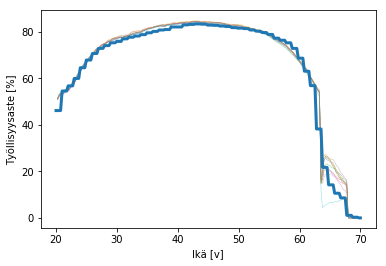

best_emp 8
Vaikutus työllisyyteen keskiarvo 1743031 htv, mediaani 1743448 htv std 5786 htv
   keskiarvo 1849573 työllistä, mediaani 1850817 työllistä, std 5741 työllistä


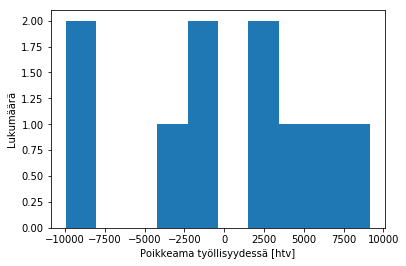

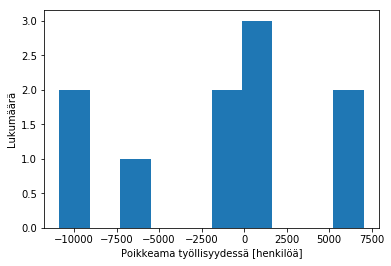

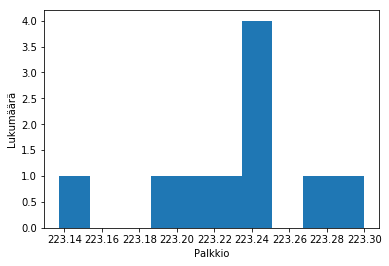

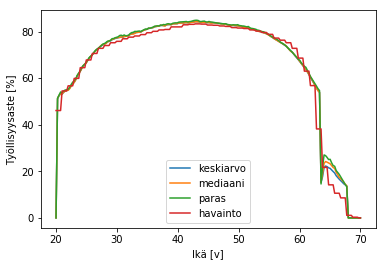

In [4]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_distrib(n=10,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/distrib_base',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



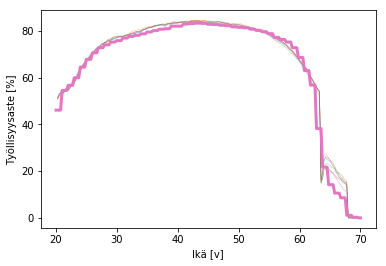

best_emp 0
Vaikutus työllisyyteen keskiarvo 1743906 htv, mediaani 1745590 htv std 6061 htv
   keskiarvo 1849400 työllistä, mediaani 1850814 työllistä, std 5602 työllistä


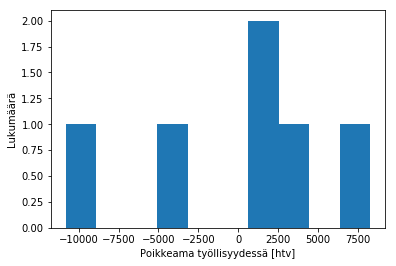

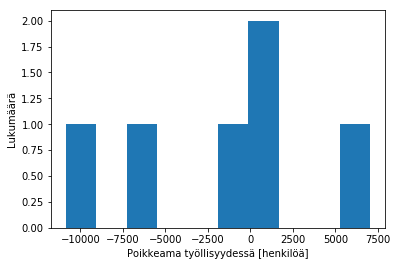

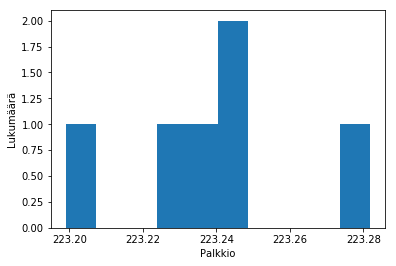

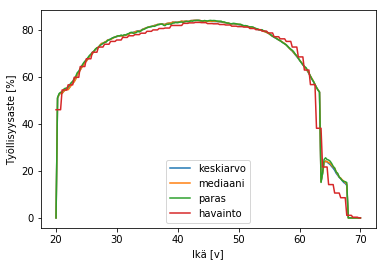

In [5]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(load='results/distrib_base_v',n=6,stats_results='results/distrib_stats')


# Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

In [ ]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
poistomalli='best/putki/malli_putki'
cc1_putki.run_distrib(n=15,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=poistomalli,plot=True,cont=True,start_from=perusmalli,results='results/putki/distrib_poisto',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

computing 0
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2635     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0126  |
| total_timesteps    | 0        |
| value_loss         | 0.0127   |
---------------------------------


In [ ]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki_b.render_distrib(load='results/putki/distrib_poisto_v')
cc1_putki_b.compare_simstats('results/putki/distrib_poisto_v','results/putki/distrib_poisto_v')                    
